<a href="https://colab.research.google.com/github/sahug/ds-nlp/blob/main/NLP%20-%20Session%2022%20-%20TFDistilBert-N-Grams%20Disaster%20Tweet%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP - Session 22 - TFDistilBert-N-Grams Disaster Tweet Classifier**

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
#Extract Data
train_data.drop(columns=["id", "keyword", "location"], axis=1, inplace=True)
test_data.drop(columns=["id", "keyword", "location"], axis=1, inplace=True)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [7]:
#Data Analysis
train_data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

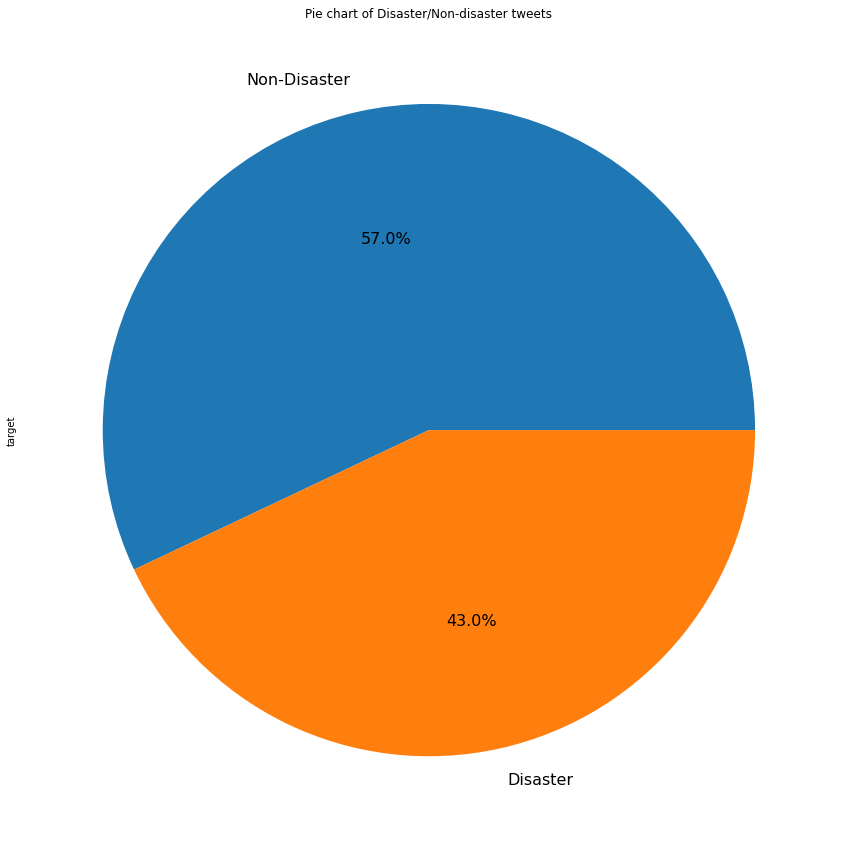

In [8]:
train_data["target"].value_counts().plot(
    kind="pie", 
    title="Pie chart of Disaster/Non-disaster tweets", 
    autopct="%1.1f%%", 
    shadow=False, 
    labels=["Non-Disaster", "Disaster"], 
    legend=False, 
    fontsize=16, 
    figsize=(15, 15))


In [9]:
train_copy = train_data.copy()

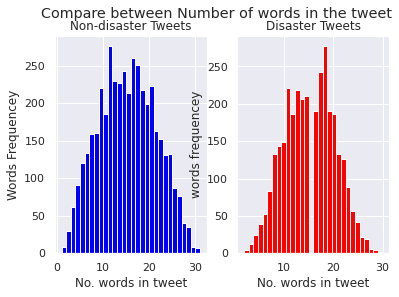

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2)
fig.suptitle("Compare between Number of words in the tweet")

axes[0].hist(train_copy[train_data["target"] == 0]["text"].str.split().map(lambda word: len(word)), bins=30, color="blue")
axes[0].set_ylabel("Words Frequencey")
axes[0].set_xlabel("No. words in tweet")
axes[0].set_title("Non-disaster Tweets")

axes[1].hist(train_copy[train_data['target'] == 1]['text'].str.split().map(lambda word: len(word)), bins=30, color='red', label='Disaster')
axes[1].set_ylabel('words frequencey')
axes[1].set_xlabel('No. words in tweet')
axes[1].set_title('Disaster Tweets')

plt.show()

In [11]:
CHAT_WORDS_STR = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [12]:
chat_words_map_dict = {}
chat_shortcut_list = set()

for line in CHAT_WORDS_STR.split("\n"):
  if line != "":
    shortcut = line.split("=")[0]
    chat_words = line.split("=")[1]
    chat_shortcut_list.add(shortcut)
    chat_words_map_dict[shortcut] = chat_words 
    
chat_words_map_dict

{'7K': 'Sick:-D Laugher',
 'A3': 'Anytime, Anywhere, Anyplace',
 'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ASL': 'Age, Sex, Location',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'B4': 'Before',
 'B4N': 'Bye For Now',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BFN': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': "For What It's Worth",
 'FYI': 'For Your Information',
 'G9': 'Genius',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GMTA': 'Great Minds Think Alike',
 'GN': 'Good Night',
 'GR8': 'Great!',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat program)',
 'ILU': 'ILU: I Love You',
 'IMHO': 'In My Honest/Humble Opinion',
 'IMO': 'In My Opinion',
 'IOW': 'In Other Words',
 'IRL': 'In Real Life',
 'KISS': 'Keep It Sim

In [13]:
def chat_words_conversion(text):
  new_text = []
  for word in text.split():
    if word.upper() in chat_words_map_dict:
      new_text.append(chat_words_map_dict[word.upper()])
    else:
      new_text.append(word)
  return " ".join(new_text)

In [14]:
#Example
context = 'Guys! brb need to go. I will be AFK next couple of mins'
chat_words_conversion(context)

'Guys! Be Right Back need to go. I will be Away From Keyboard next couple of mins'

In [15]:
train_data['text'] = train_data['text'].apply(lambda sentence: chat_words_conversion(sentence))
test_data['text'] = test_data['text'].apply(lambda sentence: chat_words_conversion(sentence)) 

In [16]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 20.0 MB/s 


In [17]:
# #Spelll Correction

# from spellchecker import SpellChecker
# spell = SpellChecker()

# def correct_spellings(text):
#   corrected_text = []
#   misspelled_words = spell.unknown(text.split())
#   for word in text.split():
#     if word in misspelled_words:
#       corrected_text.append(spell.correction(word))
#     else:
#       corrected_text.append(word)
#   return " ".join(corrected_text)

# #Example SpellChecker
# context = "Hallo there - hapy to see you"
# correct_spellings(context)

In [18]:
#The above Spellchecker is too slow. The below one is significantly faster. 
from spellchecker import SpellChecker
import re
spelling = SpellChecker(distance=1)

def misspelt_words_fn(dataframe, column):
    misspelt_words = set()
    for tweet in dataframe[column].str.casefold():
        [misspelt_words.add(word) for word in spelling.unknown(tweet.split())]
    return misspelt_words

misspelt_words = misspelt_words_fn(train_data, 'text')

WORD = re.compile(r'\w+')
def reTokenize(text):
    return WORD.findall(text.casefold())

PATTERN = re.compile(r"(.)\1{2,}")
def reduce_lengthening(text):
    return PATTERN.sub(r"\1\1", text)    

def spell_correction(text):
    return ' '.join([spelling.correction(word)
                     if word in misspelt_words else word
                     for word in reTokenize(reduce_lengthening(text))])    

In [19]:
train_data['text'] = train_data['text'].apply(lambda sentence: spell_correction(sentence))
test_data['text'] = test_data['text'].apply(lambda sentence: spell_correction(sentence)) 

In [20]:
#Parser Hashtag
import re

def parse_hashtags(text):
  hashtag = re.compile('(\#)(\w+)(_)(\w+)', re.IGNORECASE)
  text = hashtag.sub('\2 \4',text)
  return text.replace("_", " ")

train_data["text"] = train_data["text"].apply(lambda sentence: parse_hashtags(sentence))
test_data["text"] = test_data["text"].apply(lambda sentence: parse_hashtags(sentence))

In [21]:
#Remove Markdown
def md_links(text):
  markdown_link = re.compile("\[.*?\]\(.*?\)")
  return markdown_link.sub("", text)

train_data["text"] = train_data["text"].apply(lambda sentence: md_links(sentence))
test_data["text"] = test_data["text"].apply(lambda sentence: md_links(sentence))

In [22]:
#Scrape URLs
def scrape_links(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

train_data["text"] = train_data["text"].apply(lambda sentence: scrape_links(sentence))
test_data["text"] = test_data["text"].apply(lambda sentence: scrape_links(sentence))    

In [23]:
!pip install emoji

     |████████████████████████████████| 175 kB 31.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=6393dc851036964b2680b8797da02dfe1aa9c94d1742af54a9a47cea3eb3832b
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [24]:
#Dealing with Emojis
import emoji

def is_emoji(text):
  for label in text:
    if label is emoji.UNICODE_EMOJI_ENGLISH:
      return True
  return False

is_emoji_train = train_data['text'].apply(lambda sentence: is_emoji(sentence))
is_emoji_train.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  


False    7613
Name: text, dtype: int64

In [25]:
#Decode Emojis
def decode_emojis(text):
  txt_emoji_list = emoji.distinct_emoji_list(text)
  rx = "[" + re.escape("".join(txt_emoji_list)) + "]"

  if not txt_emoji_list:
    return text
  elif "©" not in txt_emoji_list:
    return re.sub(rx, "", text) + "".join([emoji.demojize(emoj).replace(':', ' ') for emoj in txt_emoji_list])
  elif ('©' in txt_emoji_list and len(txt_emoji_list) == 1):
    return text.replace('©', '')
  elif ('©' in txt_emoji_list and len(txt_emoji_list) > 1):
    text = text.replace('©', '')
    return re.sub(rx, '', text) + ''.join([emoji.demojize(emoj).replace(':', ' ') for emoj in txt_emoji_list])

In [26]:
#Example
context = "Omg another Earthquake 😔😔"
decode_emojis(context)

'Omg another Earthquake  pensive_face '

In [27]:
#Check Dataset for Emojis
is_emoji_train = train_data['text'].apply(lambda sentence: is_emoji(sentence))
is_emoji_test = test_data['text'].apply(lambda sentence: is_emoji(sentence))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  


In [28]:
train_data.loc[is_emoji_train, 'text'] = train_data.loc[is_emoji_train, 'text'].apply(lambda sentence: decode_emojis(sentence))
test_data.loc[is_emoji_test, 'text'] = test_data.loc[is_emoji_test, 'text'].apply(lambda sentence: decode_emojis(sentence))
train_data['text'].apply(lambda sentence: is_emoji(sentence)).value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  


False    7613
Name: text, dtype: int64

In [29]:
train_data['text'] = train_data['text'].apply(lambda sentence: decode_emojis(sentence))
test_data['text'] = test_data['text'].apply(lambda sentence: decode_emojis(sentence))

In [30]:
EMOTICONS =  {
    ":-(": "SAD", 
    ":(": "SAD", 
    ":-|": "SAD", 
    ";-(": "SAD", 
    ";-<": "SAD", 
    "|-{": "SAD",
    ":-)": "HAPPY",
    ":)": "HAPPY", 
    ":o)": "HAPPY",
    ":-}": "HAPPY",
    ";-}": "HAPPY", 
    ":->": "HAPPY",
    ";-)": "HAPPY"
}

In [31]:
# #Dealing with Emoticons
# def is_emot(text):
#   for emo in EMOTICONS:
#     if re.search(emo, text):
#       return True
#   return False


# is_emoji_train = train_data['text'].apply(lambda sentence: is_emot(sentence))
# is_emoji_train.value_counts() 

In [32]:
# #Convert Emoticons
# def convert_emoticons(text):
#     for emot in EMOTICONS:
#         text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
#     return text

In [33]:
!pip install contractions

     |████████████████████████████████| 106 kB 9.4 MB/s 
     |████████████████████████████████| 284 kB 39.2 MB/s 


In [34]:
#English Contractions
import contractions
def en_contractions(text):
  return " ".join([contractions.fix(word) if word in contractions.contractions_dict else word for word in text.split()])

In [35]:
#Example
example = "I've worked so hard today. I'm going to run to home!"
en_contractions(example)

'I have worked so hard today. I am going to run to home!'

In [36]:
train_data['text'] = train_data['text'].apply(lambda sentence: en_contractions(sentence))
test_data['text'] = test_data['text'].apply(lambda sentence: en_contractions(sentence))

In [37]:
#Dealing with Html
def remove_html(text):
  html = re.compile("<.*?>")
  return html.sub("", text)

In [38]:
#Example
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [39]:
train_data['text'] = train_data['text'].apply(lambda sentence: remove_html(sentence))
test_data['text'] = test_data['text'].apply(lambda sentence: remove_html(sentence))

In [40]:
#Special Characters
s_chars = '¥₽ÏïŰŬĎŸæ₿₪ÚŇÀèÅ”ĜåŽÖéříÿý€ŝĤ₹áŜŮÂ₴ûÌÇšŘúüëÓ₫ŠčÎŤÆÒœ₩öËäøÍťìĈôàĥÝ¢ç“žðÙÊĉŭÈŒÐÉÔĵùÁů„âÄűĴóêĝÞîØòď฿ČÜþňÛ'
PUNC = '+@«#_\-!$%%^&*¬()£<>?/\\|}\]\[{;\,~:\"\''

def special_char(text):

    # first, let's remove any unicode strings
    text = text.encode('ascii', 'ignore').decode()
  
    # remove printable bachslashes
    text = re.sub(r'[\t\s\n\r\b\a]', ' ', text)
  
    # Special letters
    text = re.sub(r'[{}]'.format(s_chars), '', text)
  
    # Punctuation
    text = re.sub(r'[{}]'.format(PUNC), ' ', text)
  
    # space at the start or the end of the context
    text = re.sub(r'(^\s)|(\s$)', '', text)
  
    # Single character
    text = re.sub(r'(\s[^iIaA]\s)', ' ', text)
    
    return text

In [41]:
train_data['text'] = train_data['text'].apply(lambda sentence: special_char(sentence))
test_data['text'] = test_data['text'].apply(lambda sentence: special_char(sentence))

In [42]:
#Dealing With Numbers
train_data['text'] = train_data['text'].str.replace('\d+', '', regex=True)
test_data['text'] = test_data['text'].str.replace('\d+', '', regex=True)

In [43]:
#Edge Cases
#Train Dataset
train_data['text'] = train_data['text'].str.replace("yr", 'year', regex=False)
train_data['text'] = train_data['text'].str.replace(r"\.|==|=|'|`|(PM)|(AM)|(UTC)", ' ', regex=True)
train_data['text'] = train_data['text'].str.replace("...", '', regex=False)
train_data['text'] = train_data['text'].str.replace(r"(\s[^iIaA]\s)", ' ', regex=True)
train_data['text'] = train_data['text'].str.replace(r'\s(\w$)|\s(\w[^me]$)', '', regex=True)
train_data['text'] = train_data['text'].str.replace(r'\s ', ' ', regex=True)
train_data['text'] = train_data['text'].str.replace(r'(^\s)|(\s$)', '', regex=True)

#Test Dataset
test_data['text'] = test_data['text'].str.replace("yr", 'year', regex=False)
test_data['text'] = test_data['text'].str.replace(r"\.|==|=|'|`|(PM)|(AM)|(UTC)", ' ', regex=True)
test_data['text'] = test_data['text'].str.replace("...", ' ', regex=False)
test_data['text'] = test_data['text'].str.replace(r"(\s[^iIaA]\s)", ' ', regex=True)
test_data['text'] = test_data['text'].str.replace(r'\s(\w$)|\s(\w[^me]$)', '', regex=True)
test_data['text'] = test_data['text'].str.replace(r'\s ', ' ', regex=True)
test_data['text'] = test_data['text'].str.replace(r'(^\s)|(\s$)', '', regex=True)

In [44]:
#Stop Words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

train_data['text'] = train_data['text'].apply(lambda sentence: remove_stopwords(sentence))
test_data['text'] = test_data['text'].apply(lambda sentence: remove_stopwords(sentence))    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
#Lemmantization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [46]:
train_data['text'] = train_data['text'].apply(lambda sentence: lemmatize_words(sentence))
test_data['text'] = test_data['text'].apply(lambda sentence: lemmatize_words(sentence))    

In [47]:
#Dealing With Frequent Words
DISASTER_WORDS = ['fire', 'kill', 'bomb', 'disaster', 'crash', 'flood', 'suicide', 'police', 'attack', 'storm', 'emergency', 'burn']
NON_DISASTER_WORDS = ['like', 'new', 'body', 'love', 'good']

from collections import Counter
def words_counter_removal(dataframe, column, frequency, ascending):

    counter = Counter()
    for tweet in dataframe[column].values:
        for word in tweet.split():
            counter[word] += 1
    
    # Words should not be detected
    for word in DISASTER_WORDS + NON_DISASTER_WORDS:
        counter.pop(word)
    
    if not ascending:
        return set([word for (word, counts) in counter.most_common(frequency)])
    else:
        return set([word for (word, counts) in counter.most_common()[:-frequency-1:-1]])      

In [48]:
FREQ_WORDS_TRAIN = words_counter_removal(train_data, 'text', 15, False)
FREQ_WORDS_TEST = words_counter_removal(test_data, 'text', 15, False)

In [49]:
def remove_freqwords(text, freq_words):
    return " ".join([word for word in str(text).split() if word not in freq_words])

train_data['text'] = train_data['text'].apply(lambda sentence: remove_freqwords(sentence, FREQ_WORDS_TRAIN))
test_data['text'] = test_data['text'].apply(lambda sentence: remove_freqwords(sentence, FREQ_WORDS_TEST))        

In [50]:
# Define the N-grams function
def gen_ngrams_fn(text, n_grams):

    # Split all the words and insert them into list in sequence;
    ## First, ensure that the word is not a `space`.
    ## Second, the word you're going to insert not inside the stopwords.
  
    word_list = [word for word in text.lower().split() if word != ' ']
    
    # capture N-sequence of words togther
    ngrams = zip(*[word_list[i:] for i in range(n_grams)])
    
    # Convert the context from list to str
    return [' '.join(ngram) for ngram in ngrams]

In [51]:
# Building the default dict that contains default int type
from collections import defaultdict

bigram = defaultdict(int)

for tweet in train_data["text"][train_data['target'] == 1]:

    # Select each context and add the counter of times it found.
    for context in gen_ngrams_fn(tweet, n_grams=2):
        bigram[context] += 1

bigram

defaultdict(int,
            {'deed reason': 1,
             'reason earthquake': 1,
             'earthquake may': 1,
             'may allah': 3,
             'allah forgive': 1,
             'forgive u': 1,
             'forest fire': 21,
             'fire near': 4,
             'near la': 1,
             'la range': 1,
             'range sask': 1,
             'sask canada': 1,
             'resident asked': 1,
             'asked shelter': 1,
             'shelter place': 2,
             'place notified': 1,
             'notified officer': 1,
             'officer evacuation': 1,
             'evacuation shelter': 1,
             'place order': 1,
             'order expected': 1,
             'receive wildfire': 1,
             'wildfire evacuation': 1,
             'evacuation order': 10,
             'order california': 1,
             'got sent': 1,
             'sent photo': 1,
             'photo ruby': 1,
             'ruby alaska': 1,
             'alaska smoke': 1,
   

In [52]:
def ngrams_fn_train(dataframe, target_label, n_grams, sort):

    n_grams_dict = defaultdict(int)
    
    for tweet in dataframe['text'].loc[dataframe['target'] == target_label]: #For Training because it has Target
        for context in gen_ngrams_fn(tweet, n_grams):
            # Apply N-grams probability of the occurrence of certain N-words in certain Sequence
            # in form of most occurrence
            n_grams_dict[context] +=1
    
    # Create dataframe with number of occurrences is the id we sort the data with.
    n_grams_dataframe = pd.DataFrame(n_grams_dict.items())
    n_grams_dataframe.columns = ['N-grams', 'occurs']

    if sort:
        n_grams_dataframe.sort_values(by='occurs', ascending=False, inplace=True)
    
    return n_grams_dataframe

In [53]:
def ngrams_fn_test(dataframe, n_grams, sort):

    n_grams_dict = defaultdict(int)
    
    for tweet in dataframe['text']:  #For Test because it doesn't has Target
        for context in gen_ngrams_fn(tweet, n_grams):
            # Apply N-grams probability of the occurrence of certain N-words in certain Sequence
            # in form of most occurrence
            n_grams_dict[context] +=1
    
    # Create dataframe with number of occurrences is the id we sort the data with.
    n_grams_dataframe = pd.DataFrame(n_grams_dict.items())
    n_grams_dataframe.columns = ['N-grams', 'occurs']

    if sort:
        n_grams_dataframe.sort_values(by='occurs', ascending=False, inplace=True)
    
    return n_grams_dataframe

In [54]:
def plot_ngrams(dataframe, axes, number_of_samples):
    # Plot the dataset
    sns.barplot(x=dataframe.iloc[:,1][:number_of_samples], y=dataframe.iloc[:,0][:number_of_samples], ax=axes)
    axes.set_yticks(range(number_of_samples), dataframe.iloc[:,0][:number_of_samples], size=14)

In [55]:
ngrams_fn_train(train_data, 1, 2, True)

,N-grams,occurs
17408,suicide bomber,60
936,northern california,41
15007,oil spill,38
1725,california wildfire,35
1086,suicide bombing,35
...,...,...
7605,river columbia,1
7604,okanagan river,1
7603,rating okanagan,1
7602,level rating,1


In [56]:
#Apply N Grams
#Train Data
train_data["bi-grams"] = ngrams_fn_train(train_data, 1, 2, True)["N-grams"]
train_data["tri-grams"] = ngrams_fn_train(train_data, 1, 3, True)["N-grams"]

In [57]:

#Test Data
test_data["bi-grams"] = ngrams_fn_test(test_data, 2, True)["N-grams"]
test_data["tri-grams"] = ngrams_fn_test(test_data,3, True)["N-grams"]

In [58]:
train_data

,text,target,bi-grams,tri-grams
0,deed reason earthquake may allah forgive u,1,deed reason,deed reason earthquake
1,forest fire near la range sask canada,1,reason earthquake,reason earthquake may
2,resident asked shelter place notified officer ...,1,earthquake may,earthquake may allah
3,receive wildfire evacuation order california,1,may allah,may allah forgive
4,got sent photo ruby alaska smoke wildfire pour...,1,allah forgive,allah forgive u
...,...,...,...,...
7608,two giant crane holding bridge collapse nearby...,1,fishing suspended,aftershock big initial
7609,aria ahrary thetawniest control wild fire cali...,1,suspended sep,big initial earthquake
7610,ut km volcano hawaii zdtoydebj,1,sep ryzhxklw,initial earthquake hkbpqdncba
7611,police investigating bike collided car little ...,1,away drought,sismo near coast


In [59]:
# train_target = train_data["target"]
# train_feature = train_data.drop(columns=["target"])

In [60]:
#Data Preperation
#Train and Test Split
from sklearn.model_selection import train_test_split

#Train and Validation Dataset
train, valid = train_test_split(train_data, test_size=0.3, random_state=42, stratify=train_data["target"])

#Test and Dec Dataset
dev, test = train_test_split(valid, test_size=0.1, random_state=42, stratify=valid["target"])

In [61]:
#Save Dataset
import os
PATH = "/content/sample_data/disaster-tweet/"

if not os.path.isdir(PATH):
    os.mkdir(PATH)

train.to_csv(PATH + 'train.csv', index=False)
valid.to_csv(PATH + 'valid.csv', index=False)
dev.to_csv(PATH + 'dev.csv', index=False)
test.to_csv(PATH + 'test.csv', index=False)

In [62]:
#Data prepreation
class Features:
    DEFAULT_COLUMNS = ('text', 'bi-grams', 'bri-grams', 'target')
    FEATURE_COLUMNS = ('text', 'bi-grams', 'tri-grams')
    LABEL = 'target'

In [63]:
#Function to upload dataset
import numpy as np

def load_data_fn(dataset_path, with_label):
  dataframe = pd.read_csv(dataset_path, index_col=False)
  if with_label:    
    return ({feature: dataframe[feature].astype(str).tolist() for feature in Features.FEATURE_COLUMNS}, np.asarray(dataframe[Features.LABEL]).astype('int8').reshape((-1, 1)))
  else:    
    return ({feature: dataframe[feature].astype(str).tolist() for feature in Features.FEATURE_COLUMNS})

In [64]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 15.5 MB/s 
     |████████████████████████████████| 895 kB 10.7 MB/s 
     |████████████████████████████████| 596 kB 21.9 MB/s 
     |████████████████████████████████| 6.5 MB 43.6 MB/s 
     |████████████████████████████████| 67 kB 3.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [65]:
MAX_SEQUENCE_LENGTH = 512 # Maximum sequence length allowed by BERT

MODEL_NAME = 'distilbert-base-uncased'
NUM_BASE_MODEL_OUTPUT = 768 # Represents the hidden size of the last hidden state

# we don't need to re-train DistilBERT model, so we have to set the flag of trainable to `False`
FREEZE_DISTILBERT = True

# Check whether we're going to add custom classification heads
USE_CUSTOM_HEAD = True

if not USE_CUSTOM_HEAD:
    # make the base trainable when no classification head exists
    FREEZE_DISTILBERT = False  

In [66]:
#Vectorization
NGRAM_RANGE = (2, 3) # Bi-gram, Tri-grams
TOKEN_MODE = 'word' # whether text should be split into word or character n-grams.
MIN_DOC_FREQ = 1 # min Doc/corpus frquency below which token will be discarded
MAX_BI_GRAMS_LEN = 620 # according to the vectorization
MAX_TRI_GRAMS_LEN = 1250
MAX_DOC_FREQ = 1

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

def n_gram_vectorize(text, n_grams_type):
  
  kwargs = {
    'ngram_range': NGRAM_RANGE,
    'dtype': 'int32',
    'strip_accents': 'unicode',
    'decode_error': 'replace',
    'analyzer': TOKEN_MODE, # split text into word tokens.
    'min_df': MIN_DOC_FREQ,
    'max_df': MAX_DOC_FREQ,
  }

  if n_grams_type == 'bi':
    kwargs['max_features'] = MAX_BI_GRAMS_LEN
  elif n_grams_type == 'tri':
    kwargs['max_features'] = MAX_TRI_GRAMS_LEN

  vectorize = TfidfVectorizer(**kwargs)
  train = vectorize.fit_transform(text)
  return train.todense()

In [68]:
import tensorflow as tf
from transformers import TFDistilBertModel

def build_model(n_grams_dense_units, dropout, l1_reg, lr, weight_decay):

  inputs = {"input_ids": tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH, ), dtype=tf.int32, name="distilbert_input_ids"),
            "attention_mask": tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH, ), dtype=tf.int32, name="distilbert_attention_mask"),
            "bi_grams": tf.keras.layers.Input(shape=(MAX_BI_GRAMS_LEN, ), dtype=tf.float32, name="bi_grams"),
            "tri_grams": tf.keras.layers.Input(shape=(MAX_TRI_GRAMS_LEN, ), dtype=tf.float32, name="tri_grams"),
  }

  #1. DistilBERT Base Layer
  distilbert = TFDistilBertModel.from_pretrained(MODEL_NAME, num_labels=2)

  #Freeze the distilbert model weights not to train them
  if FREEZE_DISTILBERT:
        for layer in distilbert.layers:
            layer.trainable = False

  distilbert_output = distilbert([inputs['input_ids'], inputs['attention_mask']]).last_hidden_state[:, 0, :]

  #2. Bi Grams
  bi_layer = tf.keras.layers.Dropout(dropout, name="bi_gram_dropout")(inputs["bi_grams"])
  for index, unit in enumerate(n_grams_dense_units):
    bi_layer = tf.keras.layers.Dense(units=unit, activation="relu", kernel_initializer="glorot_uniform", name=f"bi_gram_dense_{index+1}")(bi_layer)
    bi_layer = tf.keras.layers.Dropout(dropout, name=f"bi_gram_dropout_{index+1}")(bi_layer)

  #3. Tri Grams
  tri_layer = tf.keras.layers.Dropout(dropout, name="tri_gram_dropout")(inputs["tri_grams"])
  for index, unit in enumerate(n_grams_dense_units):
    tri_layer = tf.keras.layers.Dense(units=unit, activation="relu", kernel_initializer="glorot_uniform", name=f"tri_gram_dense_{index+1}")(tri_layer)
    tri_layer = tf.keras.layers.Dropout(dropout, name=f"tri_gram_dropout_{index+1}")(tri_layer)

  #Concatenate Layers
  concat = tf.keras.layers.Concatenate(axis=1)([distilbert_output, bi_layer, tri_layer])

  # Assign custom head
  if USE_CUSTOM_HEAD:
    # Comb 01
    dense_layer_1 = tf.keras.layers.Dense(units=NUM_BASE_MODEL_OUTPUT, kernel_initializer='glorot_uniform', name='hidden_layer_no_regulizer_1')(concat)
    dropout_1 = tf.keras.layers.Dropout(rate=0.15)(dense_layer_1)
    dense_layer_2 = tf.keras.layers.Dense(units=NUM_BASE_MODEL_OUTPUT, kernel_initializer='glorot_uniform', name='hidden_layer_no_regulizer_2')(dropout_1)
    
    batch_norm_1 = tf.keras.layers.BatchNormalization(name='batch_normalization01')(dense_layer_2)
    activation_1 = tf.keras.layers.Activation('leaky_relu', name='leaky_relu_01')(batch_norm_1)
            
    # Comb 02
    dense_layer_3 = tf.keras.layers.Dense(units=NUM_BASE_MODEL_OUTPUT, kernel_initializer='glorot_uniform', name='hidden_layer_no_regulizer_3')(activation_1)
    batch_norm_2 = tf.keras.layers.BatchNormalization(name='batch_normalization02')(dense_layer_3)

  activation_1 = tf.keras.layers.Activation(tf.keras.activations.gelu, name='leaky_relu_02')(batch_norm_2)
  output = tf.keras.layers.Dense(units=1, kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.L1(l1=l1_reg), activation='sigmoid', name='tweet_status')(activation_1)
  model = tf.keras.Model(inputs=inputs, outputs=output, name='distilbert-n-gram-fine-tuned-sst')

  return model


In [1]:
# Initialize the variables
TRAIN_EXAMPLES = train.shape[0]
DEVELOPMENT_EXAMPLES = dev.shape[0]
TEST_EXAMPLES = test.shape[0]
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 1e-4
DROP_RATE = 0.2
BATCH_SIZE = 128
NUM_EPOCHS = 15
L1_REGU = 0.01

NameError: ignored

In [70]:
model = build_model(dropout=DROP_RATE,
                    n_grams_dense_units=[256, 128, 64],
                    l1_reg=L1_REGU,
                    lr=LEARNING_RATE,
                    weight_decay=WEIGHT_DECAY)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [71]:
model.summary()

Model: "distilbert-n-gram-fine-tuned-sst"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bi_grams (InputLayer)          [(None, 620)]        0           []                               
                                                                                                  
 tri_grams (InputLayer)         [(None, 1250)]       0           []                               
                                                                                                  
 bi_gram_dropout (Dropout)      (None, 620)          0           ['bi_grams[0][0]']               
                                                                                                  
 tri_gram_dropout (Dropout)     (None, 1250)         0           ['tri_grams[0][0]']              
                                                                   

In [72]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name="Accuracy"),
           tf.keras.metrics.Precision(name="Precision"),
           tf.keras.metrics.Recall(name="Recall"),
]

In [73]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=METRICS)

In [74]:
#Prepare Input

from transformers import DistilBertTokenizerFast, AutoTokenizer

def input_fn(text_features, label):

  def tokenize(sentences, max_length=MAX_SEQUENCE_LENGTH, padding="max_length"):
    tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
    return tokenizer.batch_encode_plus( 
            sentences,                  
            truncation=True,
            padding=padding,
            pad_to_max_length=True,
            max_length=max_length, 
            return_tensors='tf'
            )
    
  #Tokenization
  tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)
  tokenizer_params = tokenize(text_features["text"])

  bi_grams_td = n_gram_vectorize(text_features["bi-grams"], "bi")
  tri_grams_td = n_gram_vectorize(text_features["tri-grams"], "tri")

  dataset = tf.data.Dataset.from_tensor_slices(({
             "input_ids": tokenizer_params["input_ids"],
             "attention_mask": tokenizer_params["attention_mask"],
             "bi_grams": bi_grams_td,
             "tri_grams": tri_grams_td}, 
             label))
  
  return dataset

In [75]:
train_features, train_label = load_data_fn("/content/sample_data/disaster-tweet/train.csv", True)
dev_features, dev_label = load_data_fn("/content/sample_data/disaster-tweet/dev.csv", True)

In [76]:
train_ds = input_fn(train_features, train_label)
dev_ds = input_fn(dev_features, dev_label)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be 

In [77]:
def distributed_input_fn(dataset, batch_size, epochs, input_context):
  rep_batch_size = input_context.get_per_replica_batch_size(batch_size)

  ## for shard policy
  dataset = dataset.shard(input_context.num_input_pipelines,
                            input_context.input_pipeline_id)
  ## adding option for Graph optimization
  options = tf.data.Options()
  options.experimental_optimization.noop_elimination = True
  options.experimental_optimization.apply_default_optimizations = False
  dataset = dataset.with_options(options)

  dataset = dataset.batch(rep_batch_size).repeat(epochs)
  dataset = dataset.prefetch(2)
  return dataset

In [78]:
mirrored_strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [79]:
train_ds = mirrored_strategy.distribute_datasets_from_function(lambda input_context:
                                                                   distributed_input_fn(train_ds,
                                                                                        batch_size=BATCH_SIZE,
                                                                                        epochs=NUM_EPOCHS,
                                                                                        input_context=input_context))

dev_ds = mirrored_strategy.distribute_datasets_from_function(lambda input_context:
                                                                 distributed_input_fn(dev_ds,
                                                                                      batch_size=BATCH_SIZE,
                                                                                      epochs=NUM_EPOCHS,
                                                                                      input_context=input_context))       

In [80]:
GLOBAL_BATCH_SIZE = BATCH_SIZE * mirrored_strategy.num_replicas_in_sync       

ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                          patience=2,
                                          mode='max',
                                          verbose=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                     factor=1e-3,
                                                     mode='max',
                                                     patience=0,
                                                     verbose=1)

In [ ]:
#Train Model
history = model.fit(train_ds,
                        validation_data=dev_ds,
                        validation_steps = DEVELOPMENT_EXAMPLES // GLOBAL_BATCH_SIZE,
                        steps_per_epoch=TRAIN_EXAMPLES // GLOBAL_BATCH_SIZE,
                        epochs=NUM_EPOCHS,
                        callbacks=[ES, reduce_lr])

Epoch 1/15
41/41 [==============================] - 8254s 202s/step - loss: 1.0587 - Accuracy: 0.5547 - Precision: 0.4812 - Recall: 0.4482 - val_loss: 0.8758 - val_Accuracy: 0.5854 - val_Precision: 0.5779 - val_Recall: 0.1307 - lr: 0.0010
Epoch 2/15
41/41 [==============================] - 8127s 201s/step - loss: 0.8532 - Accuracy: 0.5874 - Precision: 0.5235 - Recall: 0.4283 - val_loss: 0.8037 - val_Accuracy: 0.5859 - val_Precision: 0.5180 - val_Recall: 0.5239 - lr: 0.0010
Epoch 3/15
41/41 [==============================] - ETA: 0s - loss: 0.7557 - Accuracy: 0.6283 - Precision: 0.5876 - Recall: 0.4521  